# Data Cleaning - Coaches

In [134]:
import pandas as pd
from utils import *
import os

df = pd.read_csv('../data/players.csv')
df.head()

,bioID,pos,firstseason,lastseason,height,weight,college,collegeOther,birthDate,deathDate
0,abrahta01w,C,0,0,74.0,190,George Washington,NaN,1975-09-27,0000-00-00
1,abrossv01w,F,0,0,74.0,169,Connecticut,NaN,1980-07-09,0000-00-00
2,adairje01w,C,0,0,76.0,197,George Washington,NaN,1986-12-19,0000-00-00
3,adamsda01w,F-C,0,0,73.0,239,Texas A&M,Jefferson College (JC),1989-02-19,0000-00-00
4,adamsjo01w,C,0,0,75.0,180,New Mexico,NaN,1981-05-24,0000-00-00


In [135]:
print(df.shape[0])

893


## Dealing with Missing Values / Features

<Axes: title={'center': 'Number of null values per column'}>

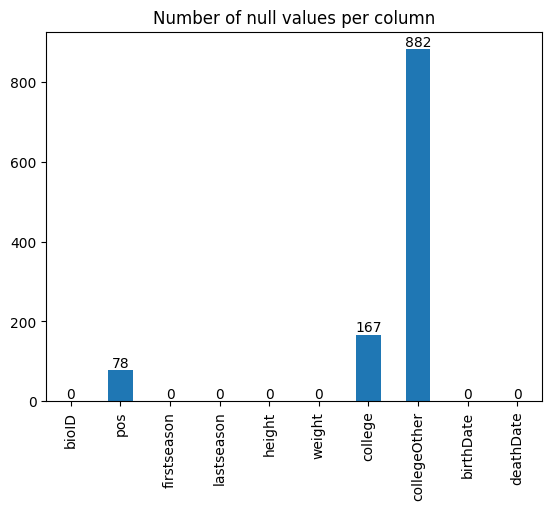

In [136]:
nulls_values_by_column(df)

In [137]:
df.drop(columns=['collegeOther'], inplace=True, axis=1)
df.dropna(inplace=True)

## Dealing with Duplicate values / Redundant Data

<Axes: title={'center': 'Number of Unique Values Per Column'}>

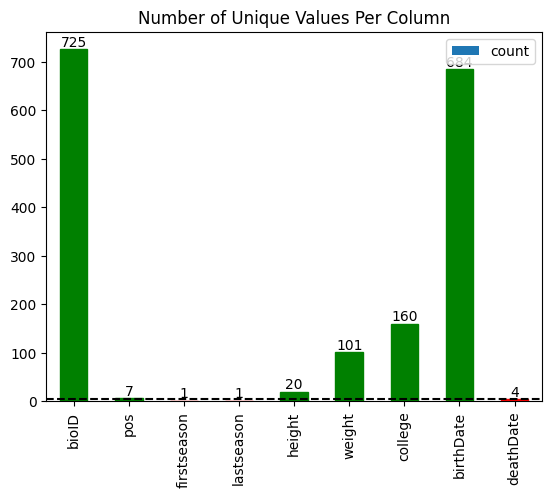

In [138]:
unique_values_by_column(df, 5)

In [139]:
num_columns = len(df.columns)
df = filter_column_uniques(df, 5)
print(f"Removed {num_columns - len(df.columns)} columns that had only five uniques values")

Removed 3 columns that had only five uniques values


In [140]:
num_rows = df.shape[0]
df.drop_duplicates(inplace=True)
print(f"Removed {num_rows - df.shape[0]} repeated rows")

Removed 0 repeated rows


## Outliers and Noise

### Detecting and Removing Noise

In [141]:
df.head()

,bioID,pos,height,weight,college,birthDate
0,abrahta01w,C,74.0,190,George Washington,1975-09-27
1,abrossv01w,F,74.0,169,Connecticut,1980-07-09
2,adairje01w,C,76.0,197,George Washington,1986-12-19
3,adamsda01w,F-C,73.0,239,Texas A&M,1989-02-19
4,adamsjo01w,C,75.0,180,New Mexico,1981-05-24


### Detecting and Removing Outliers using ...

### Removing Noise

In [142]:
df = df[df['birthDate'] != '0000-00-00']

print(df['birthDate'].min())
print(df['birthDate'].max())

1958-07-01
1991-08-18


In [143]:
print(df['height'].min())
print(df['height'].max())

62.0
80.0


In [144]:
df = df[df['weight'] != 0]

print(df['weight'].min())
print(df['weight'].max())

115
253


### ... z-score

This is a simple way to detect outliers using the z-score. The z-score is the number of standard deviations away from the mean a data point is. If the absolute value of the z-score is greater than 3, we can flag this data point as an outlier.

Let's take a look at the z-score range using a histogram plot.

<module 'matplotlib.pyplot' from '/home/daniel/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

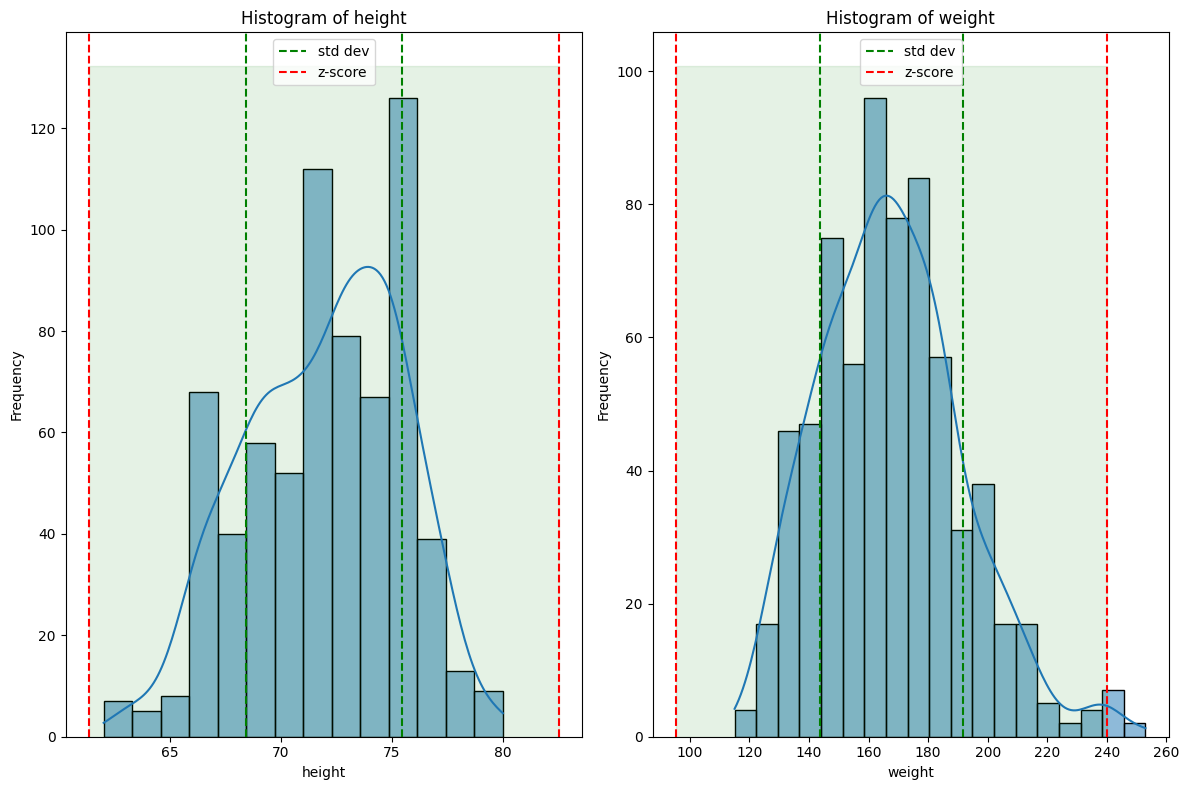

In [145]:
max_zscore = 3
rows2drop = set()
histogram_plot(df, max_zscore)

Now let's use the z-score to detect and remove outliers from the dataset.

In [146]:
rows2drop_zscore = filter_by_zscore(df, max_zscore)
print(f"Removed {len(rows2drop_zscore)} rows with zscore > {max_zscore}")

rows2drop.update(rows2drop_zscore)

Removed 7 rows with zscore > 3


### ... Interquartile Range (IQR)

The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1. The IQR may also be called the midspread or middle 50%. It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

Let's take a look at the IQR range using a histogram plot.

<module 'matplotlib.pyplot' from '/home/daniel/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

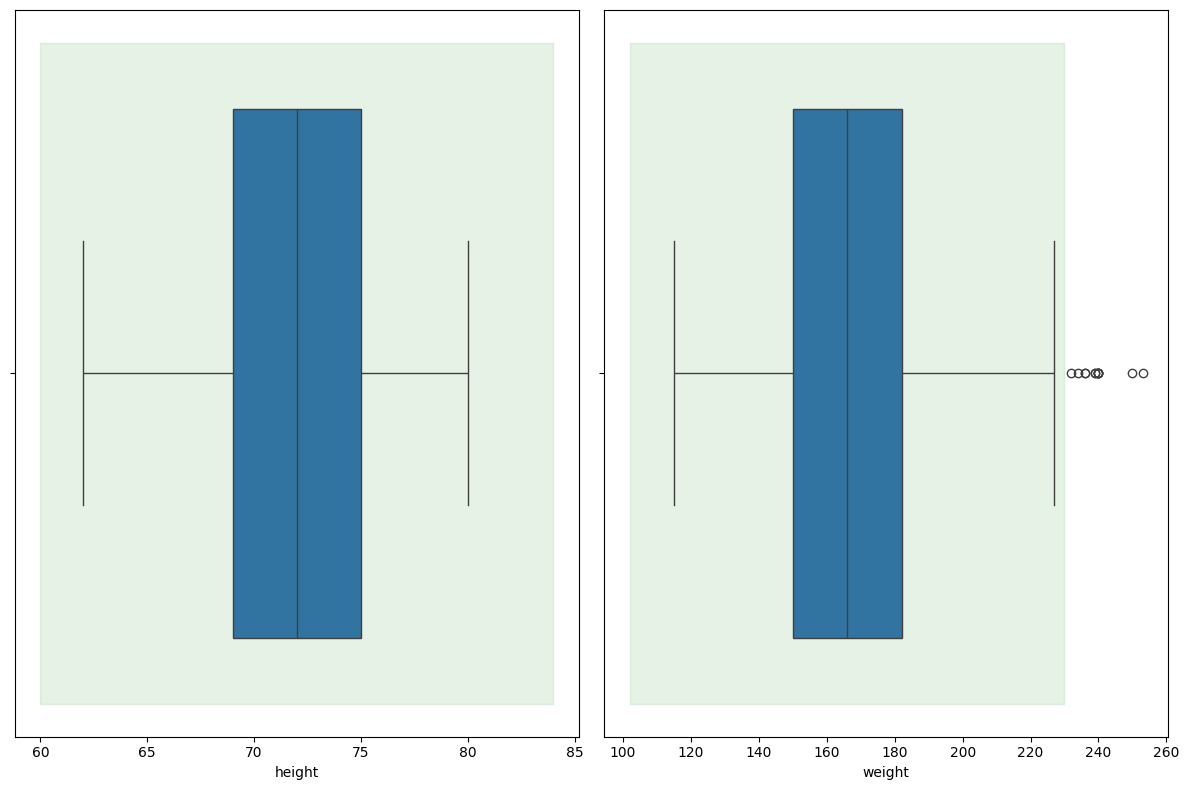

In [147]:
factor = 1.5
iqr_plot(df)

Now let's use the IQR to detect and remove outliers from the dataset.

In [148]:
rows2drop_iqr = filter_by_iqr(df, factor, ['post_wins', 'lost', 'stint'])
print(f"Removed {len(rows2drop_iqr)} rows with factor = {factor}")

rows2drop.update(rows2drop_iqr)

Removed 13 rows with factor = 1.5


### ... Scatter Plot

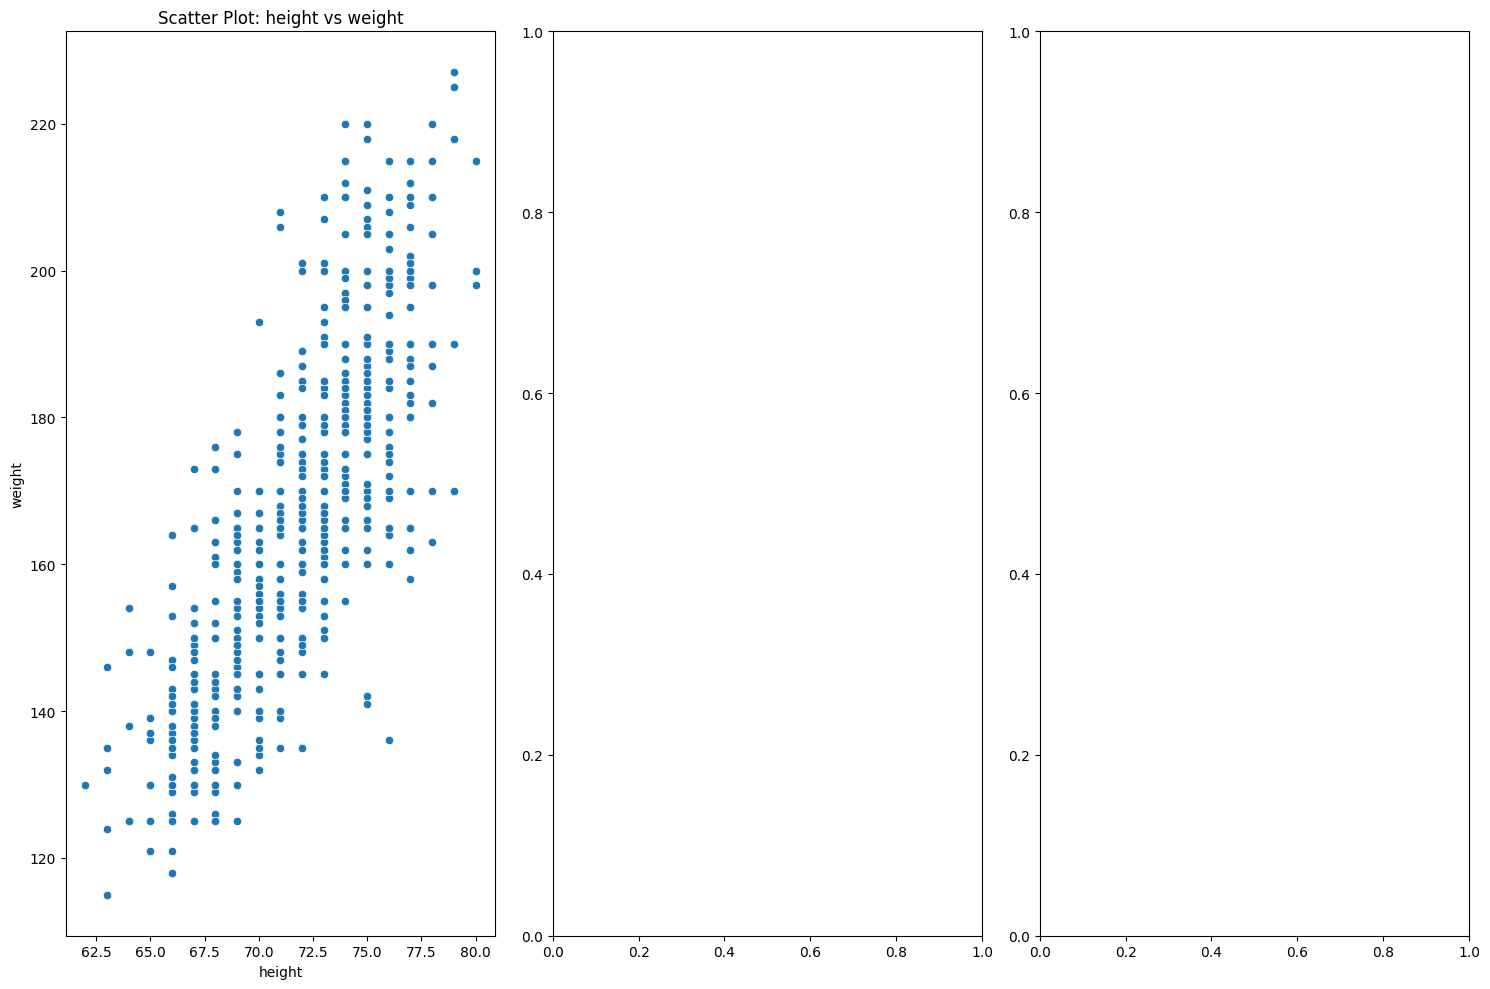

In [149]:
scatter_plot(df.drop(rows2drop))

In [150]:
print(f"Founded {len(rows2drop)} ({round(len(rows2drop) / df.shape[0] * 100, 1)}%) outliers")
df.drop(rows2drop, axis = 0, inplace=True)

Founded 20 (2.9%) outliers


## Save Dataset

In [151]:
if not os.path.exists('../data_clean'):
    os.makedirs('../data_clean')

df.to_csv('../data_clean/players.csv', index=False)